# * Import Libraries*

In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


# **upload dataset**

In [467]:
df=pd.read_csv('/content/hotel_bookings.csv')

# **basic exploration**

In [468]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [469]:
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Top 5 most frequent values:")
    display(df[col].value_counts().head())


Unique values in categorical columns:

Column: hotel
Number of unique values: 2
Top 5 most frequent values:


,count
hotel,
City Hotel,79330
Resort Hotel,40060



Column: arrival_date_month
Number of unique values: 12
Top 5 most frequent values:


,count
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089



Column: meal
Number of unique values: 5
Top 5 most frequent values:


,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798



Column: country
Number of unique values: 177
Top 5 most frequent values:


,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287



Column: market_segment
Number of unique values: 8
Top 5 most frequent values:


,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295



Column: distribution_channel
Number of unique values: 5
Top 5 most frequent values:


,count
distribution_channel,
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5



Column: reserved_room_type
Number of unique values: 10
Top 5 most frequent values:


,count
reserved_room_type,
A,85994
D,19201
E,6535
F,2897
G,2094



Column: assigned_room_type
Number of unique values: 12
Top 5 most frequent values:


,count
assigned_room_type,
A,74053
D,25322
E,7806
F,3751
G,2553



Column: deposit_type
Number of unique values: 3
Top 5 most frequent values:


,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162



Column: customer_type
Number of unique values: 4
Top 5 most frequent values:


,count
customer_type,
Transient,89613
Transient-Party,25124
Contract,4076
Group,577



Column: reservation_status
Number of unique values: 3
Top 5 most frequent values:


,count
reservation_status,
Check-Out,75166
Canceled,43017
No-Show,1207



Column: reservation_status_date
Number of unique values: 926
Top 5 most frequent values:


,count
reservation_status_date,
2015-10-21,1461
2015-07-06,805
2016-11-25,790
2015-01-01,763
2016-01-18,625


In [470]:
org_shape =df.shape[0]
print(df.shape)
print("row:",org_shape ,"\ncolumn:",df.shape[1])

(119390, 32)
row: 119390 
column: 32


In [471]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [472]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
256,Resort Hotel,0,91,2015,July,28,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Check-Out,2015-07-12
66166,City Hotel,1,181,2017,April,15,15,1,1,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,130.50,0,0,Canceled,2017-01-27
97130,City Hotel,0,25,2016,September,38,12,1,0,1,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,108.00,0,2,Check-Out,2016-09-13
113424,City Hotel,0,30,2017,June,23,6,0,1,2,0.0,0,SC,USA,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,7.0,NaN,0,Transient,96.00,0,1,Check-Out,2017-06-07
54904,City Hotel,0,215,2016,July,31,29,2,7,1,0.0,0,BB,LVA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,90.95,0,1,Check-Out,2016-08-07


In [473]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [474]:
print(df['children'].value_counts())
print(df['country'].value_counts())
print(df['agent'].value_counts())

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
197.0        1
294.0        1
388.0        1
453.0        1
480.0        1
Name: count, Length: 333, dtype: int64


In [475]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
print(columns_with_nulls)

company     112593
agent        16340
country        488
children         4
dtype: int64


<Axes: >

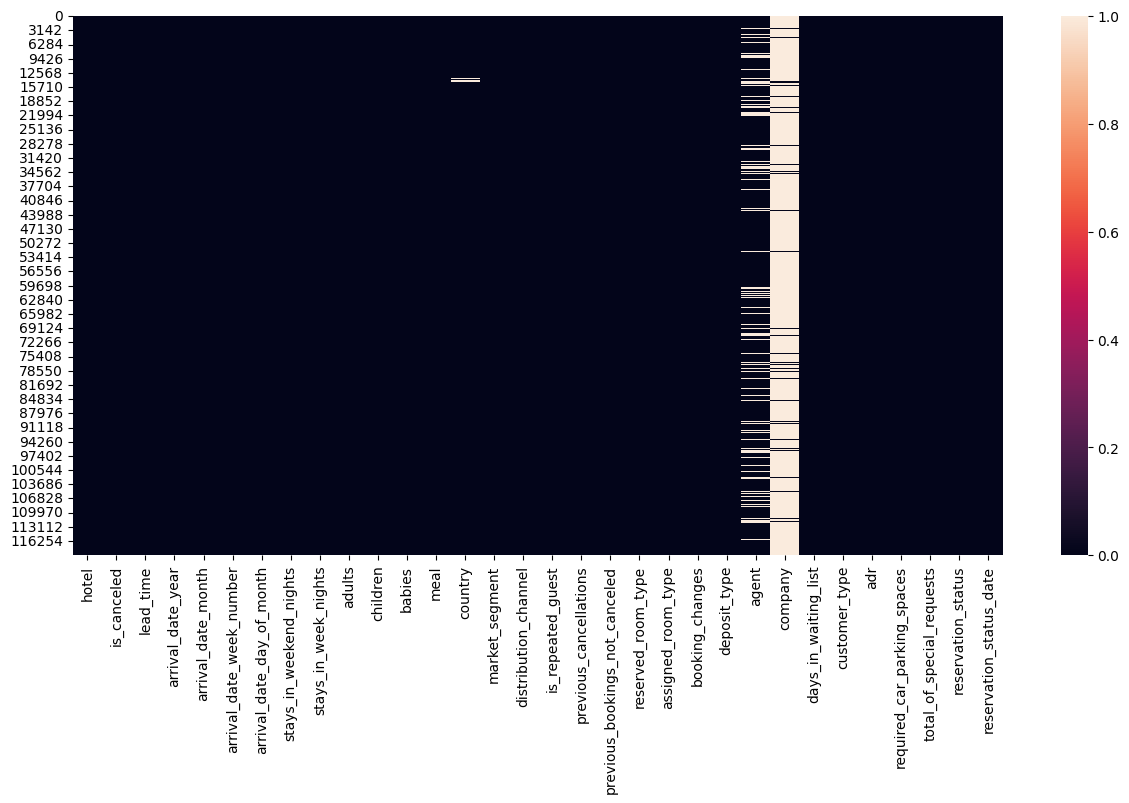

In [476]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull())


In [477]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

In [478]:
df.duplicated().sum()

np.int64(31994)

# **Data Cleaning**




In [479]:
df_clean = df.copy()


In [480]:
df_clean.drop_duplicates(inplace=True)

In [481]:
row_drop = org_shape - df_clean.shape[0]
print(row_drop)

31994


In [482]:
df_clean.shape

(87396, 32)

In [483]:
df_clean.isnull().sum().sum()

np.int64(94786)

In [484]:
df_clean.drop(columns='company',inplace=True)

In [485]:
df_clean = df_clean.drop('agent', axis=1)


In [486]:
mode_children = df_clean['children'].mode()[0]
df_clean['children'].fillna(mode_children, inplace=True)

/tmp/ipython-input-1537333733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['children'].fillna(mode_children, inplace=True)


In [487]:
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace=True)

/tmp/ipython-input-1529907501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['country'].fillna(df_clean['country'].mode()[0], inplace=True)


In [488]:
neg_adr = (df_clean['adr'] < 0).sum()
print("negative adr rows:", neg_adr)
df_clean = df_clean[df_clean['adr'] >= 0].copy()

print("Clean shape:", df_clean.shape)

negative adr rows: 1
Clean shape: (87395, 30)


In [489]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
bad_guests = (df_clean['total_guests'] == 0).sum()
print("rows with zero guests:", bad_guests)
df_clean = df_clean[df_clean['total_guests'] > 0].copy()

rows with zero guests: 166


In [490]:
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean ['stays_in_week_nights']

In [491]:
outlier_cols = ['adr', 'lead_time', 'total_nights', 'total_guests']

for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values at the bounds
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers handled for:", outlier_cols)

Outliers handled for: ['adr', 'lead_time', 'total_nights', 'total_guests']


In [492]:
87396-166

87230

In [493]:
df_clean.shape

(87229, 32)

# **Exploratory Data Analysis**

In [494]:
df_eda = df_clean.copy()


In [495]:
df_eda.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
0,Resort Hotel,0,296,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0.0
1,Resort Hotel,0,296,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2.0


Percentage of canceled bookings:
is_canceled
0    72.475897
1    27.524103
Name: proportion, dtype: float64


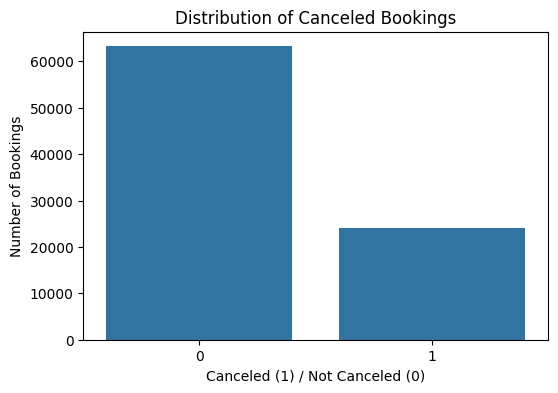

In [496]:
cancel_percentage = df_eda['is_canceled'].value_counts(normalize=True) * 100
print("Percentage of canceled bookings:")
print(cancel_percentage)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x='is_canceled')
plt.title('Distribution of Canceled Bookings')
plt.xlabel('Canceled (1) / Not Canceled (0)')
plt.ylabel('Number of Bookings')
plt.show()

**Reasoning**:
Analyze the relationship between 'is_canceled' and 'hotel' by calculating the cancellation rate for each hotel type and visualizing it with a bar plot.




Cancellation rate by hotel type:
hotel
City Hotel      30.099110
Resort Hotel    23.484023
Name: is_canceled, dtype: float64


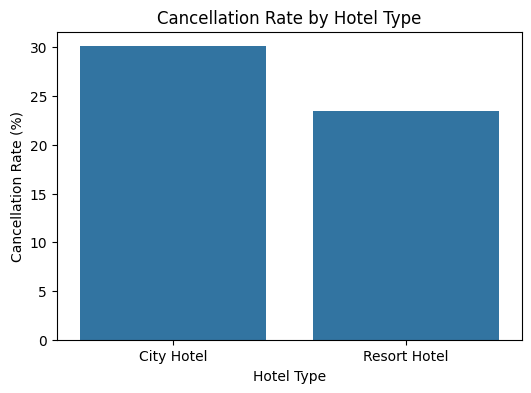

In [497]:
hotel_cancel_rate = df_eda.groupby('hotel')['is_canceled'].mean() * 100
print("\nCancellation rate by hotel type:")
print(hotel_cancel_rate)

plt.figure(figsize=(6, 4))
sns.barplot(x=hotel_cancel_rate.index, y=hotel_cancel_rate.values)
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

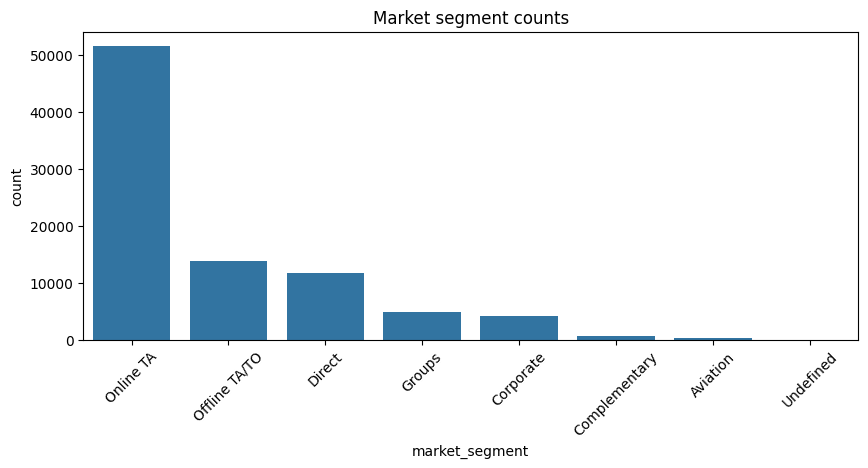

In [498]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_eda, x='market_segment', order=df_eda['market_segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Market segment counts')
plt.show()

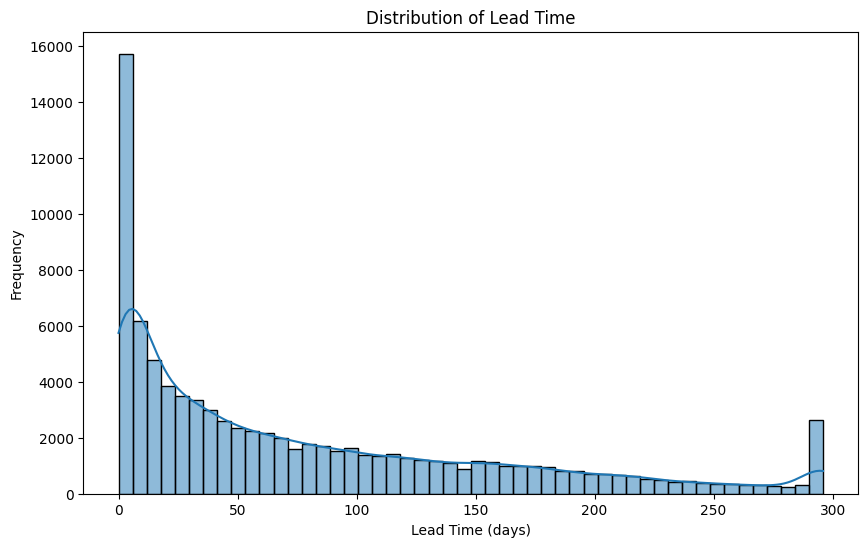

In [499]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x='lead_time', bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

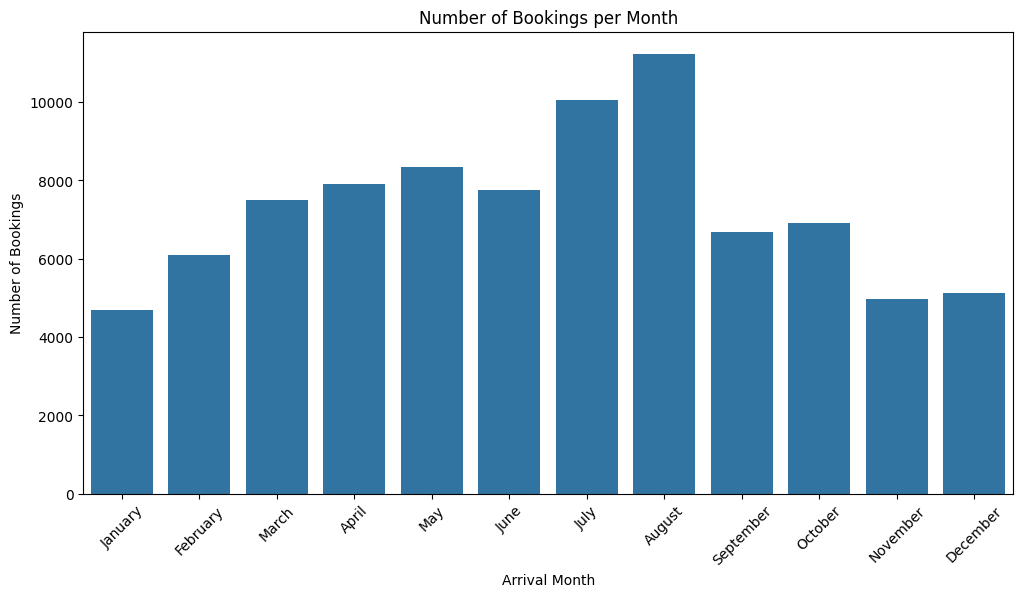

In [500]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_eda, x='arrival_date_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Bookings per Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

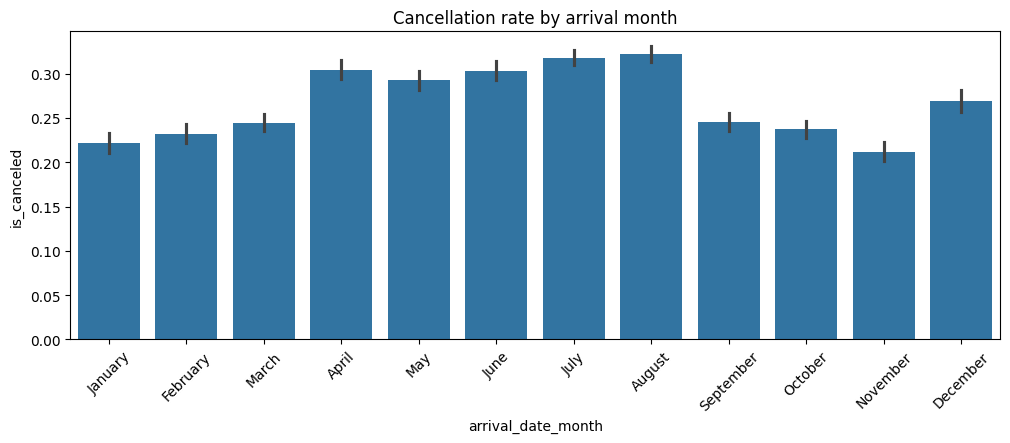

In [501]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.figure(figsize=(12,4))
sns.barplot(data=df_eda, x='arrival_date_month', y='is_canceled', estimator=np.mean, order=month_order)
plt.xticks(rotation=45)
plt.title('Cancellation rate by arrival month')
plt.show()

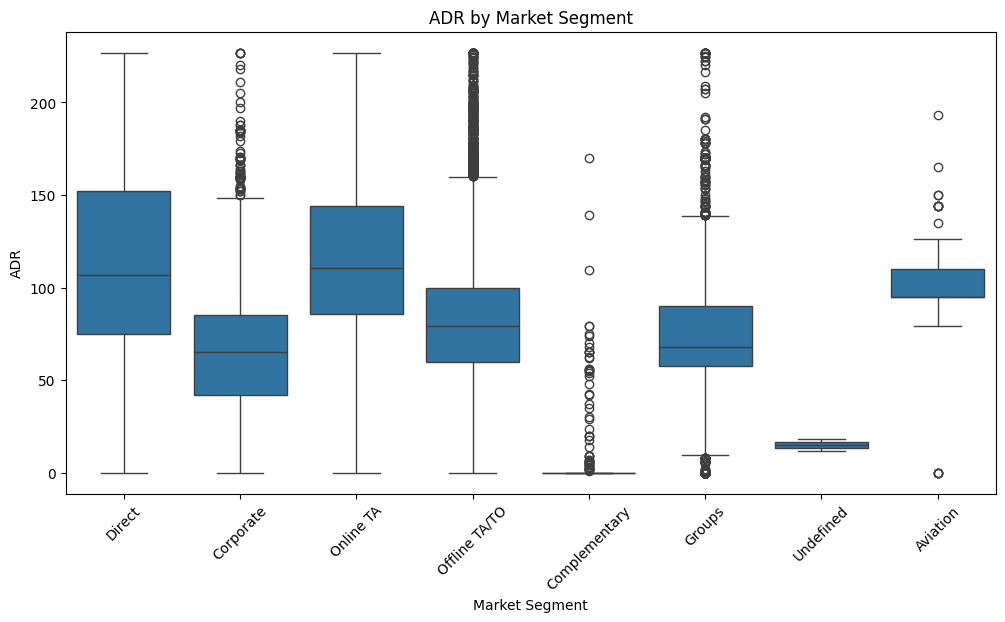

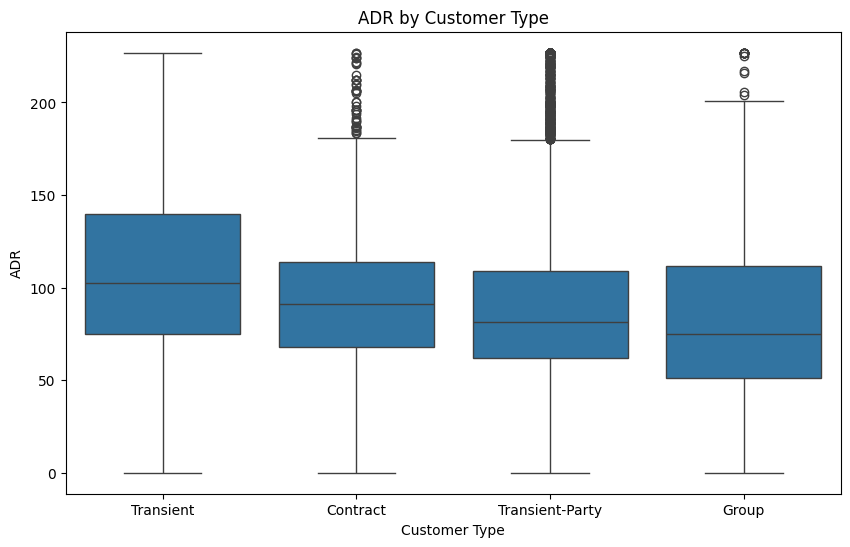

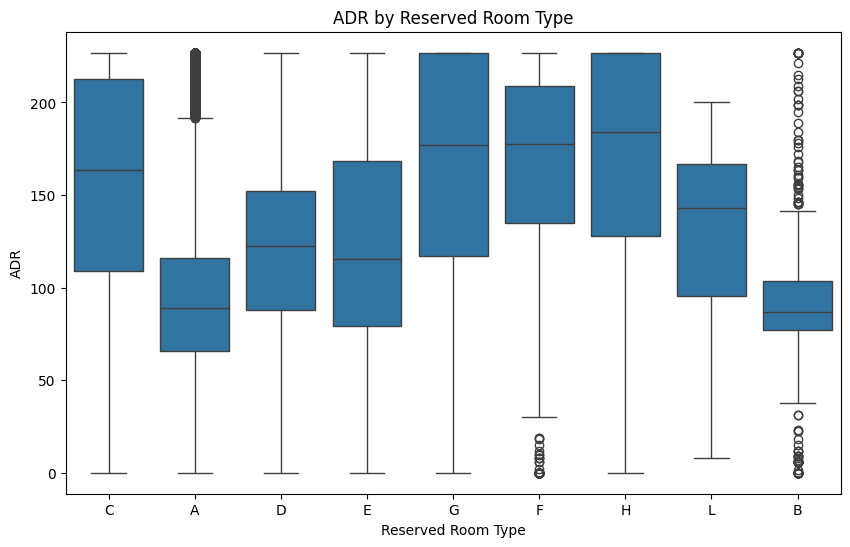

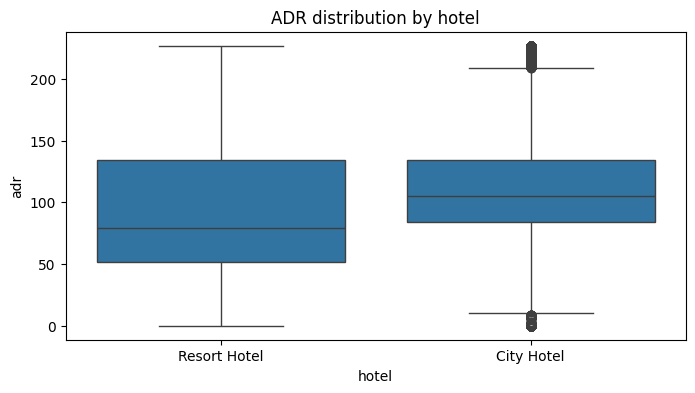

In [502]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_eda, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='customer_type', y='adr')
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='reserved_room_type', y='adr')
plt.title('ADR by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df_eda, x='hotel', y='adr')
plt.title('ADR distribution by hotel')
plt.show()

# **Feature Engineering**

In [503]:
df_pre=df_eda.copy()


In [504]:
df_pre['is_family'] = (df_pre['children'] + df_pre['babies'] > 0).astype(int)


In [505]:
df_pre['is_family'] = df_pre['is_family'].map({0: 'No', 1: 'Yes'})
display(df_pre['is_family'].value_counts())

,count
is_family,
No,78126
Yes,9103


In [506]:
df_pre['prev_cancel_rate'] = df_pre['previous_cancellations'] / (1 + df_pre['previous_bookings_not_canceled'])

In [507]:
country_freq = df_pre['country'].value_counts(normalize=True)
df_pre['country_freq'] = df_pre['country'].map(country_freq)

In [508]:
df_pre[['total_nights','total_guests','is_family','prev_cancel_rate','country_freq']].sample(10)

,total_nights,total_guests,is_family,prev_cancel_rate,country_freq
70539,7.0,2.0,No,0.0,0.318724
101620,3.0,2.0,No,0.0,0.005904
27720,7.0,2.0,No,0.0,0.119490
38754,4.0,2.0,No,0.0,0.012530
105376,3.0,2.0,No,0.0,0.101148
63314,3.0,2.0,No,0.0,0.009355
15044,3.0,2.0,No,1.0,0.318724
8536,3.0,2.0,Yes,0.0,0.017953
104400,4.0,2.0,No,0.0,0.061734
17853,7.0,2.0,No,0.0,0.119490


In [509]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87229 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   arrival_date_year               87229 non-null  int64  
 4   arrival_date_month              87229 non-null  object 
 5   arrival_date_week_number        87229 non-null  int64  
 6   arrival_date_day_of_month       87229 non-null  int64  
 7   stays_in_weekend_nights         87229 non-null  int64  
 8   stays_in_week_nights            87229 non-null  int64  
 9   adults                          87229 non-null  int64  
 10  children                        87229 non-null  float64
 11  babies                          87229 non-null  int64  
 12  meal                            8722

In [510]:
df_pre.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_guests',
       'total_nights', 'is_family', 'prev_cancel_rate', 'country_freq'],
      dtype='object')

In [511]:
columns_to_drop = [
    'required_car_parking_spaces', 'arrival_date_year', 'arrival_date_month',
    'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'adults', 'children', 'babies', 'country','reservation_status',
       'reservation_status_date','stays_in_week_nights', 'is_repeated_guest','previous_bookings_not_canceled'
]


df_pre.drop(columns=columns_to_drop, inplace=True)

# **Preprocessing Setup**

In [512]:
num_cols = df_pre.select_dtypes(include='number').columns
cat_cols = df_pre.select_dtypes(include='object').columns

In [513]:
cat_cols

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'is_family'],
      dtype='object')

In [514]:
num_cols

Index(['is_canceled', 'lead_time', 'previous_cancellations', 'booking_changes',
       'days_in_waiting_list', 'adr', 'total_of_special_requests',
       'total_guests', 'total_nights', 'prev_cancel_rate', 'country_freq'],
      dtype='object')

In [515]:
TARGET = 'is_canceled'

In [516]:
num_cols = df_pre.select_dtypes(include=np.number).columns.tolist()
num_cols.remove(TARGET)
cat_cols = df_pre.select_dtypes(include='object').columns.tolist()

In [517]:
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'total_guests', 'total_nights', 'prev_cancel_rate', 'country_freq']
Categorical columns: ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_family']


In [518]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [519]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [520]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ],
    remainder='passthrough'
)

In [521]:
x=df_pre.drop('is_canceled',axis=1)
y=df_pre['is_canceled']

# **Train-Test Split**

In [522]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Model Training**

In [523]:

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
print("Random Forest Pipeline created:")



Random Forest Pipeline created:


In [538]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])
print("\nLogistic Regression Pipeline created:")




Logistic Regression Pipeline created:


In [525]:
pipeline_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lead_time',
                                                   'previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'total_of_special_requests',
                                                   'total_guests',
                                                   'total_nights',
                                                   'prev_cancel_rate',
                                                   'country_freq']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'is_family'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [526]:
pipeline_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lead_time',
                                                   'previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'total_of_special_requests',
                                                   'total_guests',
                                                   'total_nights',
                                                   'prev_cancel_rate',
                                                   'country_freq']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'is_family'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [527]:
y_pred_log = pipeline_lr.predict(x_test)

In [528]:
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12674
           1       0.67      0.40      0.50      4772

    accuracy                           0.78     17446
   macro avg       0.74      0.66      0.68     17446
weighted avg       0.77      0.78      0.76     17446

ROC AUC: 0.663946762987132


In [529]:
y_pred_rf = pipeline_rf.predict(x_test)

In [530]:
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     12674
           1       0.70      0.58      0.64      4772

    accuracy                           0.82     17446
   macro avg       0.78      0.75      0.76     17446
weighted avg       0.81      0.82      0.81     17446

ROC AUC: 0.7452174697200716


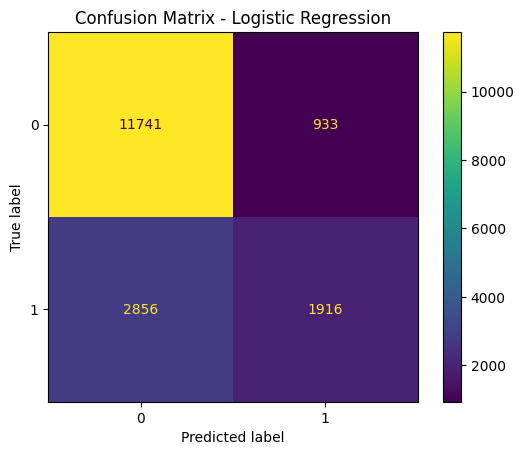

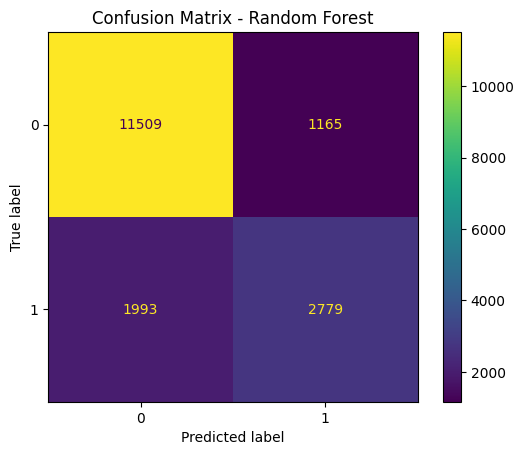

In [531]:
# Generate and plot confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
disp_log.ax_.set_title('Confusion Matrix - Logistic Regression')
plt.show()

# Generate and plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
disp_rf.ax_.set_title('Confusion Matrix - Random Forest')
plt.show()

In [535]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy score: ", grid_search_rf.best_score_)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation accuracy score:  0.8251723199059944


In [536]:
# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned_rf = best_rf_model.predict(x_test)

In [537]:
print("Tuned Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_tuned_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_tuned_rf))

Tuned Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     12674
           1       0.73      0.57      0.64      4772

    accuracy                           0.83     17446
   macro avg       0.79      0.75      0.76     17446
weighted avg       0.82      0.83      0.82     17446

ROC AUC: 0.745494485413505


In [540]:
joblib.dump(best_rf_model, 'hotel_cancellation_model.pkl')

print("Model saved as hotel_cancellation_model.pkl")

Model saved as hotel_cancellation_model.pkl
